`$ pip install ffnet`

In [1]:
from ffnet._tests import runtest
runtest()

testReadData (ffnet._tests.TestDataReader) ... ok
testArray (ffnet._tests.TestExport2Fortran) ... ok
testCall (ffnet._tests.TestFfnetSigmoid) ... ok
testDerivative (ffnet._tests.TestFfnetSigmoid) ... ok
testDerivative2 (ffnet._tests.TestFfnetSigmoid) ... ok
testRenormalize (ffnet._tests.TestFfnetSigmoid) ... ok
testSqerror (ffnet._tests.TestFfnetSigmoid) ... ok
testSqgrad (ffnet._tests.TestFfnetSigmoid) ... ok
testTestdata (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainBfgs (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainCg (ffnet._tests.TestFfnetSigmoid) ... 

Test of BFGS algorithm
Skipped because of problems on some scipy compilations.
Test of conjugate gradient algorithm
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 39
         Function evaluations: 128
         Gradient evaluations: 128


ok
testTrainGenetic (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainMomentum (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainRprop (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainTnc (ffnet._tests.TestFfnetSigmoid) ... ok
testTrainTncMp (ffnet._tests.TestFfnetSigmoid) ... 

Testing results for 4 testing cases:
OUTPUT 1 (node nr 4):
Regression line parameters:
slope         =  0.999989
intercept     = -0.000009
r-value       =  1.000000
p-value       =  0.000000
slope stderr  =  0.000014
estim. stderr =  0.000014

Test of genetic algorithm optimization
Testing results for 4 testing cases:
OUTPUT 1 (node nr 4):
Regression line parameters:
slope         =  1.094433
intercept     = -0.044136
r-value       =  0.997480
p-value       =  0.002520
slope stderr  =  0.055044
estim. stderr =  0.055044

Test of backpropagation momentum algorithm
Testing results for 4 testing cases:
OUTPUT 1 (node nr 4):
Regression line parameters:
slope         =  0.994933
intercept     =  0.002470
r-value       =  0.999999
p-value       =  0.000001
slope stderr  =  0.001199
estim. stderr =  0.001199

Test of rprop algorithm
Initial error --> 0.5*(sum of squared errors at output): 0.531261475569617
Final error   --> 0.5*(sum of squared errors at output): 0.000000000000438
Testing resu

ok
testExportNoDerivative (ffnet._tests.TestSaveLoadExport) ... 

Testing results for 4 testing cases:
OUTPUT 1 (node nr 4):
Regression line parameters:
slope         =  0.999997
intercept     =  0.000002
r-value       =  1.000000
p-value       =  0.000000
slope stderr  =  0.000002
estim. stderr =  0.000002



ok
testExportWithDerivative (ffnet._tests.TestSaveLoadExport) ... 

/Volumes/PANZER/Github/learning-space/Python


ok
testSaveLoad (ffnet._tests.TestSaveLoadExport) ... ok
testNoCycles (ffnet._tests.Testbconec) ... ok
testNoCycles (ffnet._tests.Testdconec) ... ok
testNoCycles (ffnet._tests.Testdconec2) ... ok
testEmpty (ffnet._tests.Testffconec) ... ok
testNoCycles (ffnet._tests.Testffconec) ... ok
testWithCycles (ffnet._tests.Testffconec) ... ok
testEmpty (ffnet._tests.Testimlgraph) ... ok
testNoBiases (ffnet._tests.Testimlgraph) ... ok
testOneLayer (ffnet._tests.Testimlgraph) ... ok
testThreeLayers (ffnet._tests.Testimlgraph) ... ok
testTwoLayers (ffnet._tests.Testimlgraph) ... ok
testEqualInRanges (ffnet._tests.Testlinear) ... ok
testEqualOutRanges (ffnet._tests.Testlinear) ... ok
testNormalCase (ffnet._tests.Testlinear) ... ok
testEmpty (ffnet._tests.Testmlgraph) ... ok
testNoBiases (ffnet._tests.Testmlgraph) ... ok
testOneLayer (ffnet._tests.Testmlgraph) ... ok
testThreeLayers (ffnet._tests.Testmlgraph) ... ok
testTwoLayers (ffnet._tests.Testmlgraph) ... ok
testEmpty (ffnet._tests.Testnormarra

# Sine training

In [2]:
### Sine training example for ffnet ###
from ffnet import ffnet
from math import pi, sin, cos

In [3]:
# Let's define network connectivity by hand:
conec = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 6), (3, 6), (4, 6), (5, 6), \
         (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]
# Note 1: Biases in ffnet are handled as the connections
#         from special node numbered 0. Input nodes cannot be biased.
# Note 2: Node numbering and order of links in conec is meaningless,
#         but the connections have to be from source to target.
# Note 3: The same connectivity can be obtained using mlgraph function
#         provided with ffnet (layered architecture (1,4,1)).

In [4]:
conec

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 6),
 (3, 6),
 (4, 6),
 (5, 6),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6)]

In [5]:
# Network creation
net = ffnet(conec)

In [6]:
# Generation of training data (sine values for x from 0 to 2*pi)
patterns = 16
input = [ [ 0. ] ] + [ [ k*2*pi/patterns ] for k in xrange(1, patterns + 1) ]
target = [ [ sin(x[0]) ] for x in input ]

In [7]:
# Training network
#first find good starting point with genetic algorithm (not necessary, but may be helpful)
print "FINDING STARTING WEIGHTS WITH GENETIC ALGORITHM..."
net.train_genetic(input, target, individuals=20, generations=500)

#then train with scipy tnc optimizer
print "TRAINING NETWORK..."
net.train_tnc(input, target, maxfun = 5000, messages=1)

FINDING STARTING WEIGHTS WITH GENETIC ALGORITHM...
TRAINING NETWORK...


In [8]:
# Testing network
print
print "TESTNG NETWORK..."
output, regression = net.test(input, target, iprint = 2)


TESTNG NETWORK...
Feed-forward neural network: 
inputs:     1 
hiddens:    4 
outputs:    1 
connections and biases:   13

Testing results for 17 testing cases:
OUTPUT 1 (node nr 6):
Targets vs. outputs:
   1      0.000000      0.006890
   2      0.382683      0.360870
   3      0.707107      0.731372
   4      0.923880      0.935009
   5      1.000000      0.978889
   6      0.923880      0.902681
   7      0.707107      0.711834
   8      0.382683      0.402873
   9      0.000000      0.005444
  10     -0.382683     -0.398919
  11     -0.707107     -0.719089
  12     -0.923880     -0.912762
  13     -1.000000     -0.982405
  14     -0.923880     -0.928290
  15     -0.707107     -0.723047
  16     -0.382683     -0.369628
  17     -0.000000     -0.003909
Regression line parameters:
slope         =  0.998330
intercept     = -0.000129
r-value       =  0.999758
p-value       =  0.000000
slope stderr  =  0.005677
estim. stderr =  0.016057



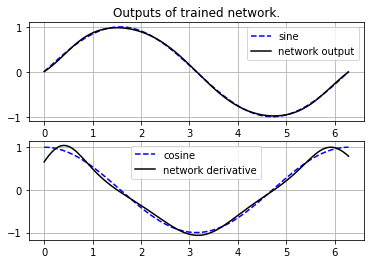

In [9]:
#################
# Make some plots
try:
    from pylab import *
    points = 128
    xaxis = [ 0. ] + [ k*2*pi/points for k in xrange(1, points + 1) ]
    sine = [ sin(x) for x in xaxis ]
    cosine = [ cos(x) for x in xaxis ]
    netsine = [ net([x])[0] for x in xaxis]
    netcosine = [ net.derivative([x])[0][0] for x in xaxis ]

    subplot(211)
    plot(xaxis, sine, 'b--', xaxis, netsine, 'k-')
    legend(('sine', 'network output'))
    grid(True)
    title('Outputs of trained network.')

    subplot(212)
    plot(xaxis, cosine, 'b--', xaxis, netcosine, 'k-')
    legend(('cosine', 'network derivative'))
    grid(True)
    show()
except ImportError:
    print "Cannot make plots. For plotting install matplotlib..."

# Parallel training

In [10]:
### Multiprocessing training example for ffnet ###
from ffnet import ffnet, mlgraph
from scipy import rand

In [11]:
# Generate random training data (large)
input = rand(10000, 10)
target = rand(10000, 1)

In [12]:
# Define net (large one)
conec = mlgraph((10,300,1))
net = ffnet(conec)

In [ ]:
# Test training speed-up
# Note that the below *if* is necessary only on Windows
if __name__=='__main__':    
    from time import time
    from multiprocessing import cpu_count
    
    # Preserve original weights
    weights0 = net.weights.copy()
    
    print "TRAINING, this can take a while..."
    for n in range(1, cpu_count()+1):
        net.weights[:] = weights0  #Start always from the same point
        t0 = time()
        net.train_tnc(input, target, nproc = n, maxfun=50, messages=0)
        t1 = time()
        print '%s processes: %s s' %(n, t1-t0)

TRAINING, this can take a while...
